In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [99]:
smoker_dummies = pd.get_dummies(df['size'], prefix='smoker')

In [100]:
smoker_dummies

,smoker_1,smoker_2,smoker_3,smoker_4,smoker_5,smoker_6
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,True,False,False,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
239,False,False,True,False,False,False
240,False,True,False,False,False,False
241,False,True,False,False,False,False
242,False,True,False,False,False,False


In [101]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [102]:
df['smoker'] = df['smoker'].map({'Yes' : 1, 'No' : 0})

<Axes: ylabel='day'>

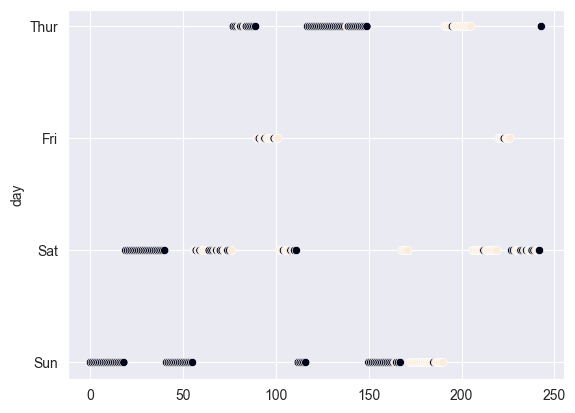

In [103]:
sns.scatterplot(df['day'], c = df['smoker'])

In [104]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


In [105]:
## Feature Selection -- Filter Approach

## Using Chi Square Independence Test
from sklearn.feature_selection import chi2, SelectKBest

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [107]:
for i in [i for i in df.select_dtypes(include = 'category')]:
    counts = df[i].value_counts()
    print("\n"f"Value Counts for {i} column - {counts}")


Value Counts for sex column - sex
Male      157
Female     87
Name: count, dtype: int64

Value Counts for smoker column - smoker
0    151
1     93
Name: count, dtype: int64

Value Counts for day column - day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Value Counts for time column - time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [108]:
cat_data = df.select_dtypes(include = 'category')
cat_data.head()
cat_data = cat_data.drop(columns='time', axis = 1)
cat_data

,sex,smoker,day
0,Female,0,Sun
1,Male,0,Sun
2,Male,0,Sun
3,Male,0,Sun
4,Female,0,Sun
...,...,...,...
239,Male,0,Sat
240,Female,1,Sat
241,Male,1,Sat
242,Male,0,Sat


In [109]:
##OHE
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_cat = ohe.fit_transform(cat_data).toarray()
feature_names = ohe.get_feature_names_out([i for i in cat_data])
encode_cat = pd.DataFrame(encoded_cat, columns = feature_names)


In [110]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(encode_cat, df['time'].apply(lambda x :1 if x == 'Dinner' else 0))

SelectKBest(k='all', score_func=<function chi2 at 0x1749c6b00>)

In [111]:
chi2_score = pd.DataFrame({'feature_names' : feature_names, "Score" : chi2_selector.scores_})
chi2_score


,feature_names,Score
0,sex_Female,6.612822
1,sex_Male,3.664430
2,smoker_0,0.280518
3,smoker_1,0.455465
4,day_Fri,0.761047
5,day_Sat,33.613636
6,day_Sun,29.363636
7,day_Thur,153.374353


In [117]:
selected_categorical_features = chi2_score[chi2_score['Score'] > 5]['feature_names']
type(selected_categorical_features)

pandas.core.series.Series

In [113]:
final_categorical_features = encode_cat[selected_categorical_features]
final_categorical_features

,sex_Female,day_Sat,day_Sun,day_Thur
0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,1.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


In [116]:
num_data = df.select_dtypes(include = 'number')
num_data

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2
